In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv
/kaggle/input/multiple-disease-prediction/blood_samples_dataset_test.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [3]:
train = pd.read_csv('/kaggle/input/multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv')
test = pd.read_csv('/kaggle/input/multiple-disease-prediction/blood_samples_dataset_test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [6]:
print(f'{train.shape}')
print(f'{test.shape}')

(2351, 25)
(486, 25)


In [7]:
train.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


**Missing Value Check**

In [8]:
train.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [9]:
test.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [10]:
train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


# **2. Data Visualization**

**Histogram**

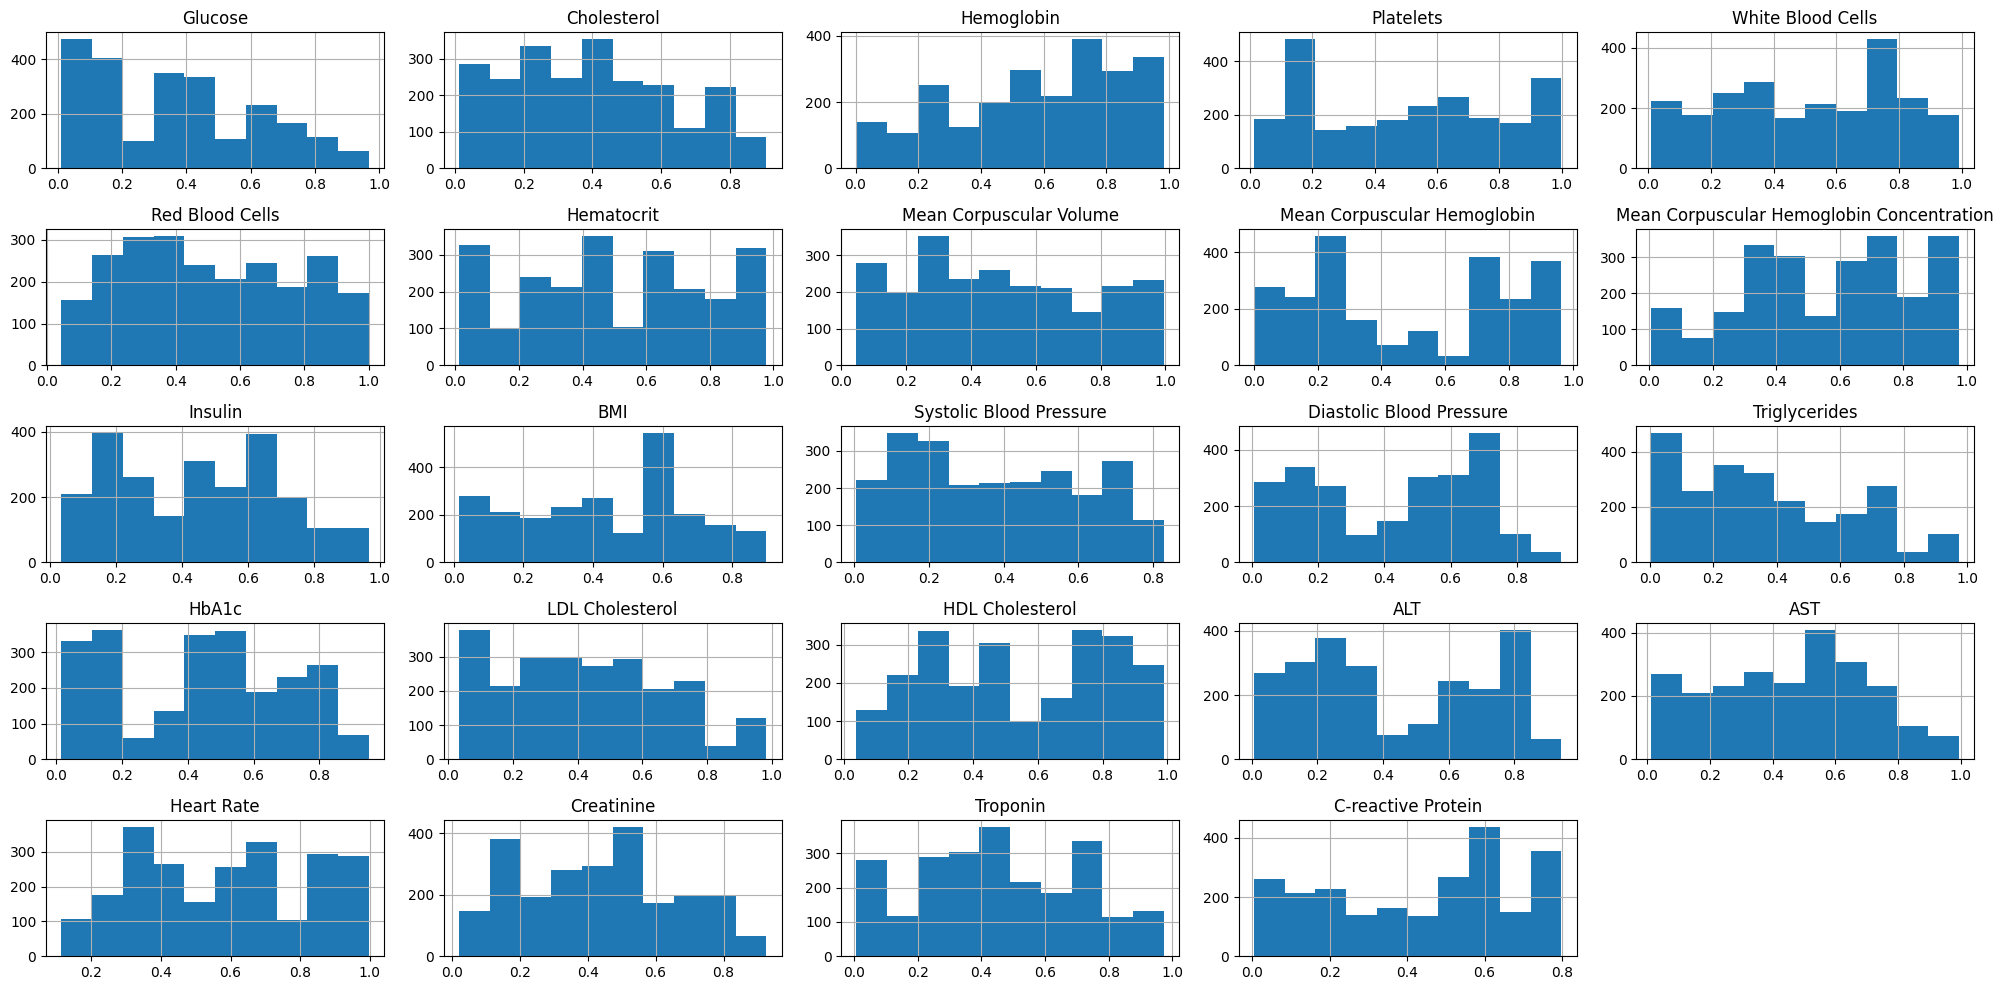

In [11]:
train.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

--------------

**Count by disease**

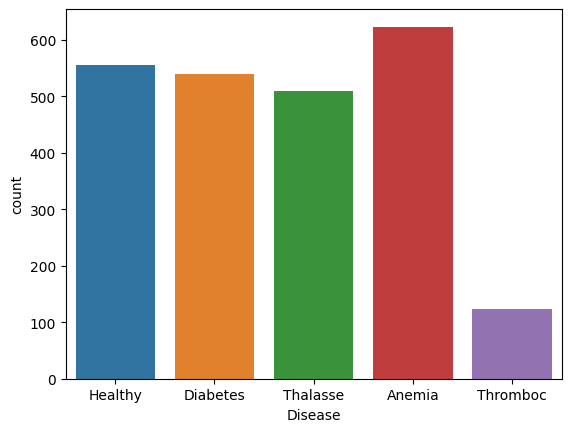

In [12]:
sns.countplot(data= train, x= 'Disease')
plt.show()

----------------

**Boxplot of Numeric variables**

In [14]:
numeric_cols =['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein' ]

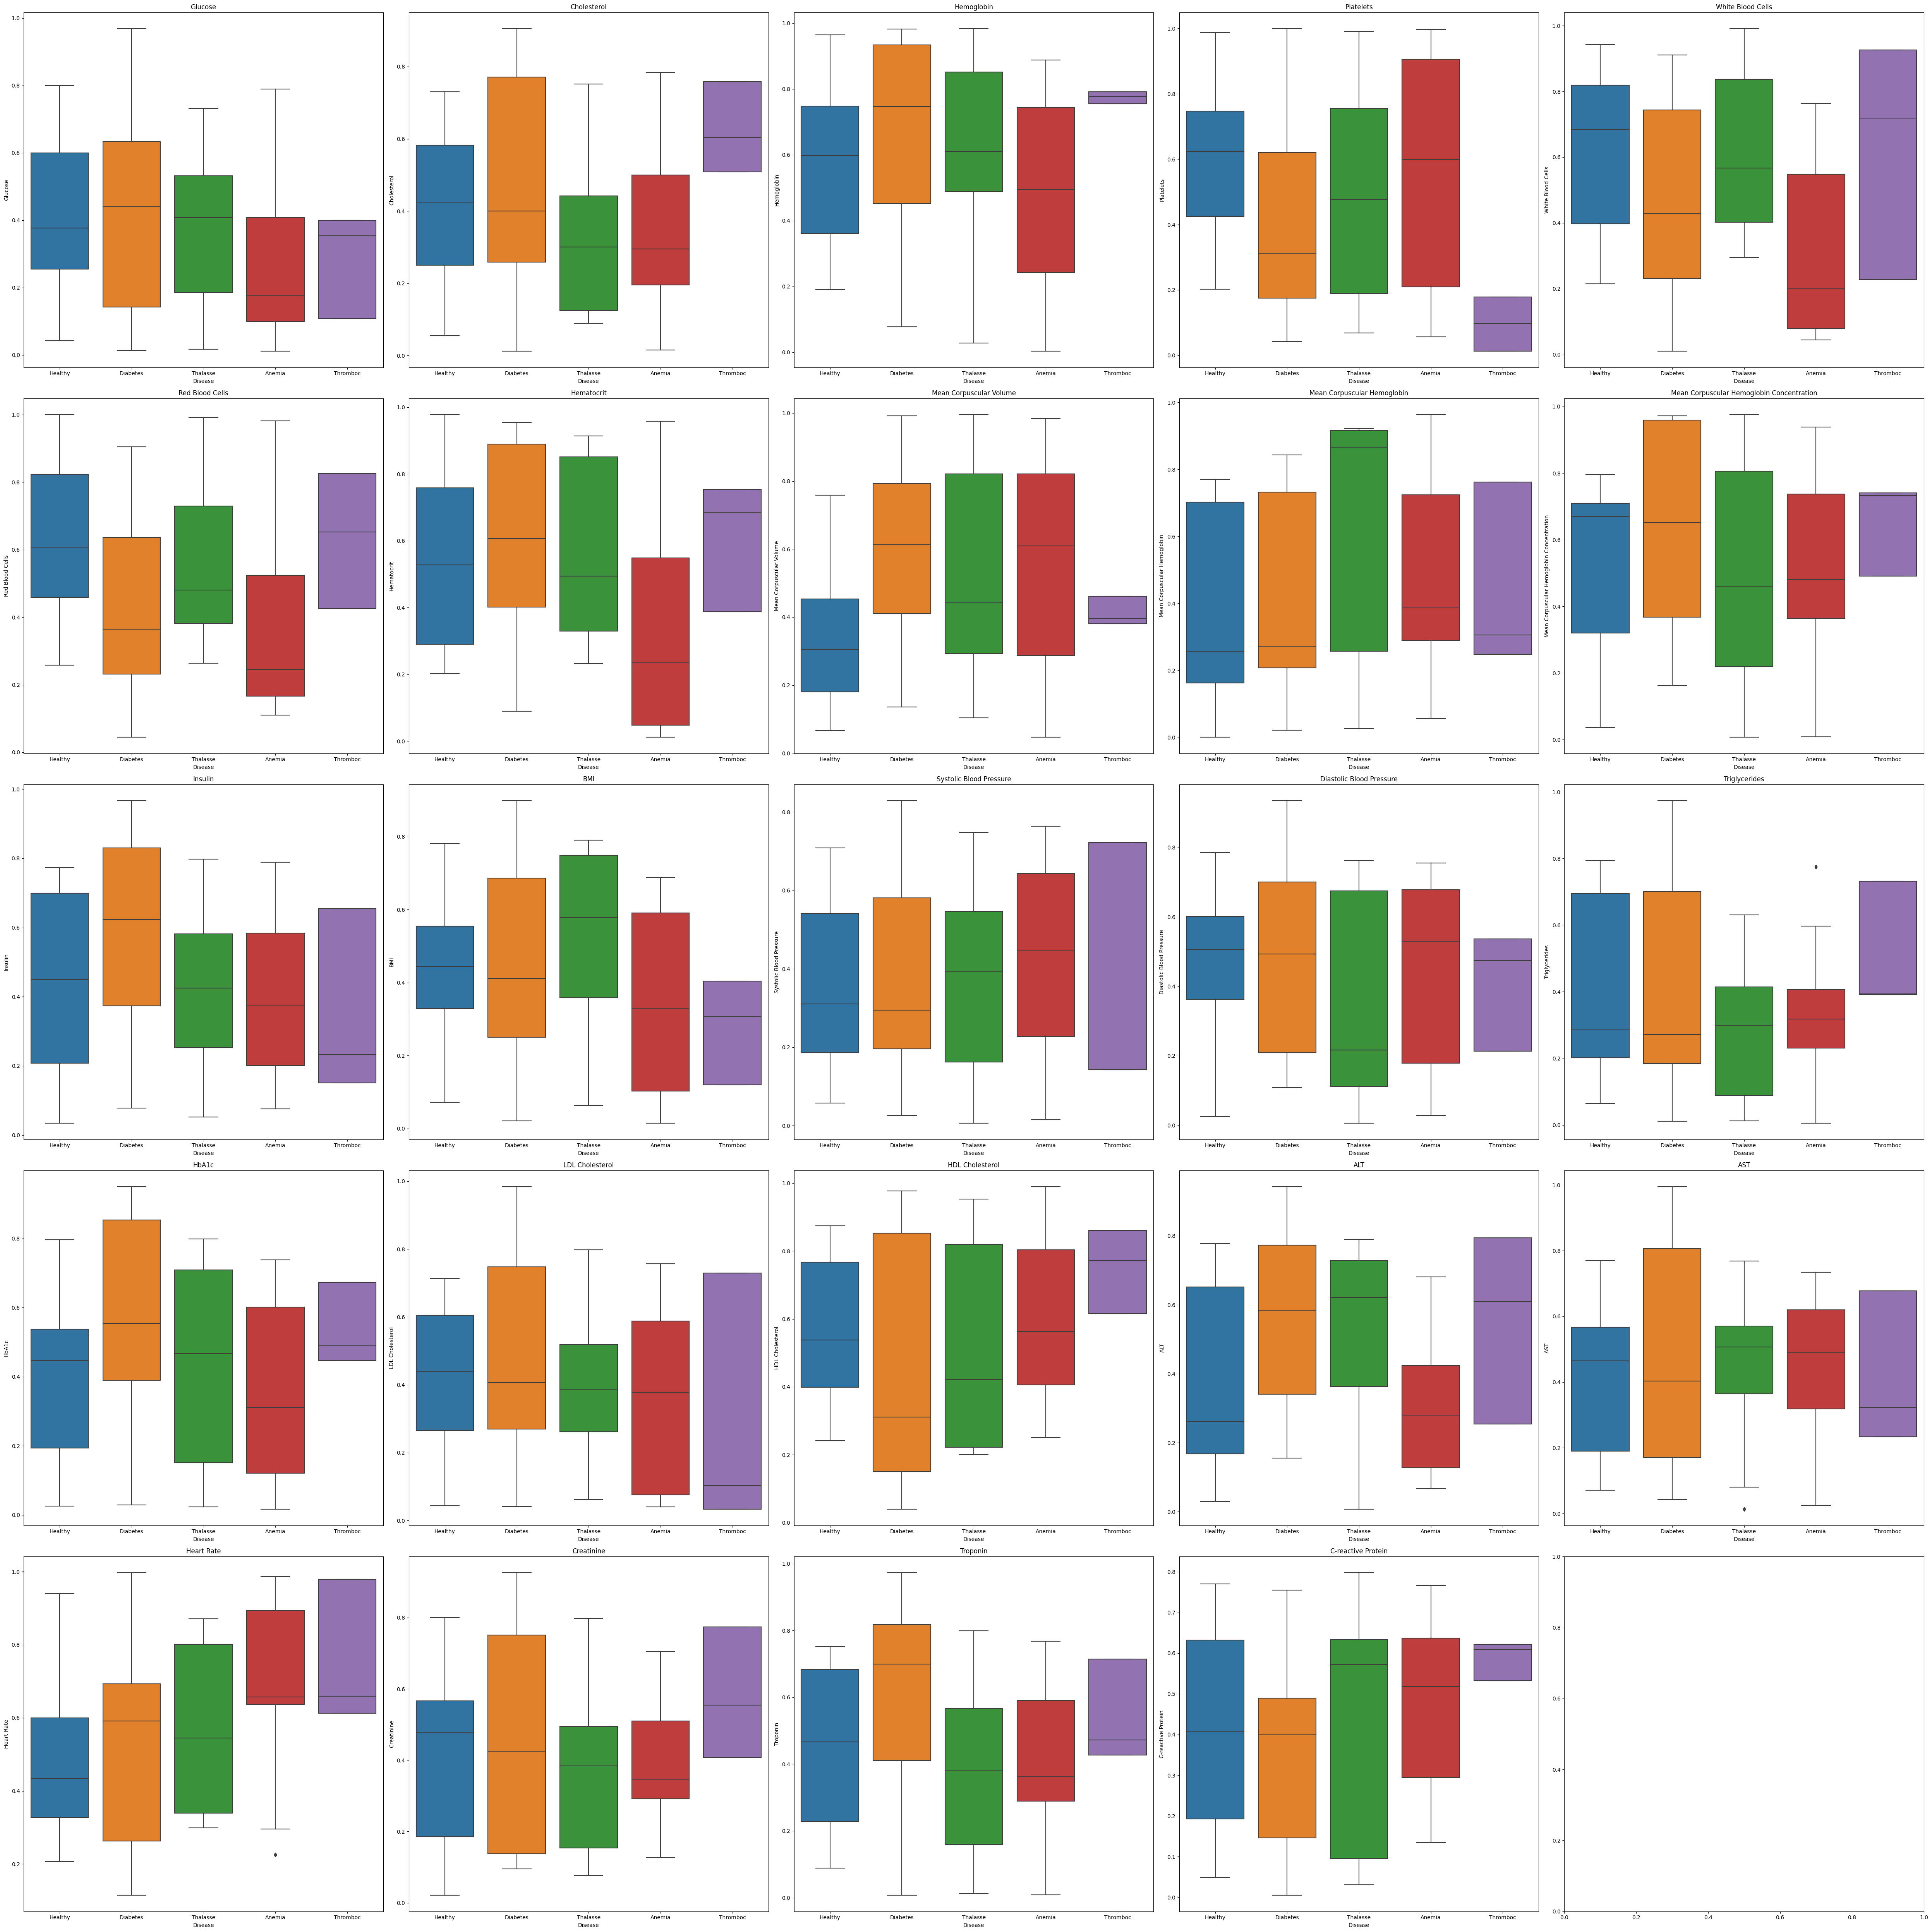

In [15]:
f, ax = plt.subplots(5,5, figsize=(50, 50))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data = train, x = 'Disease', y = cols, ax=ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

-------------------

**Correlation**

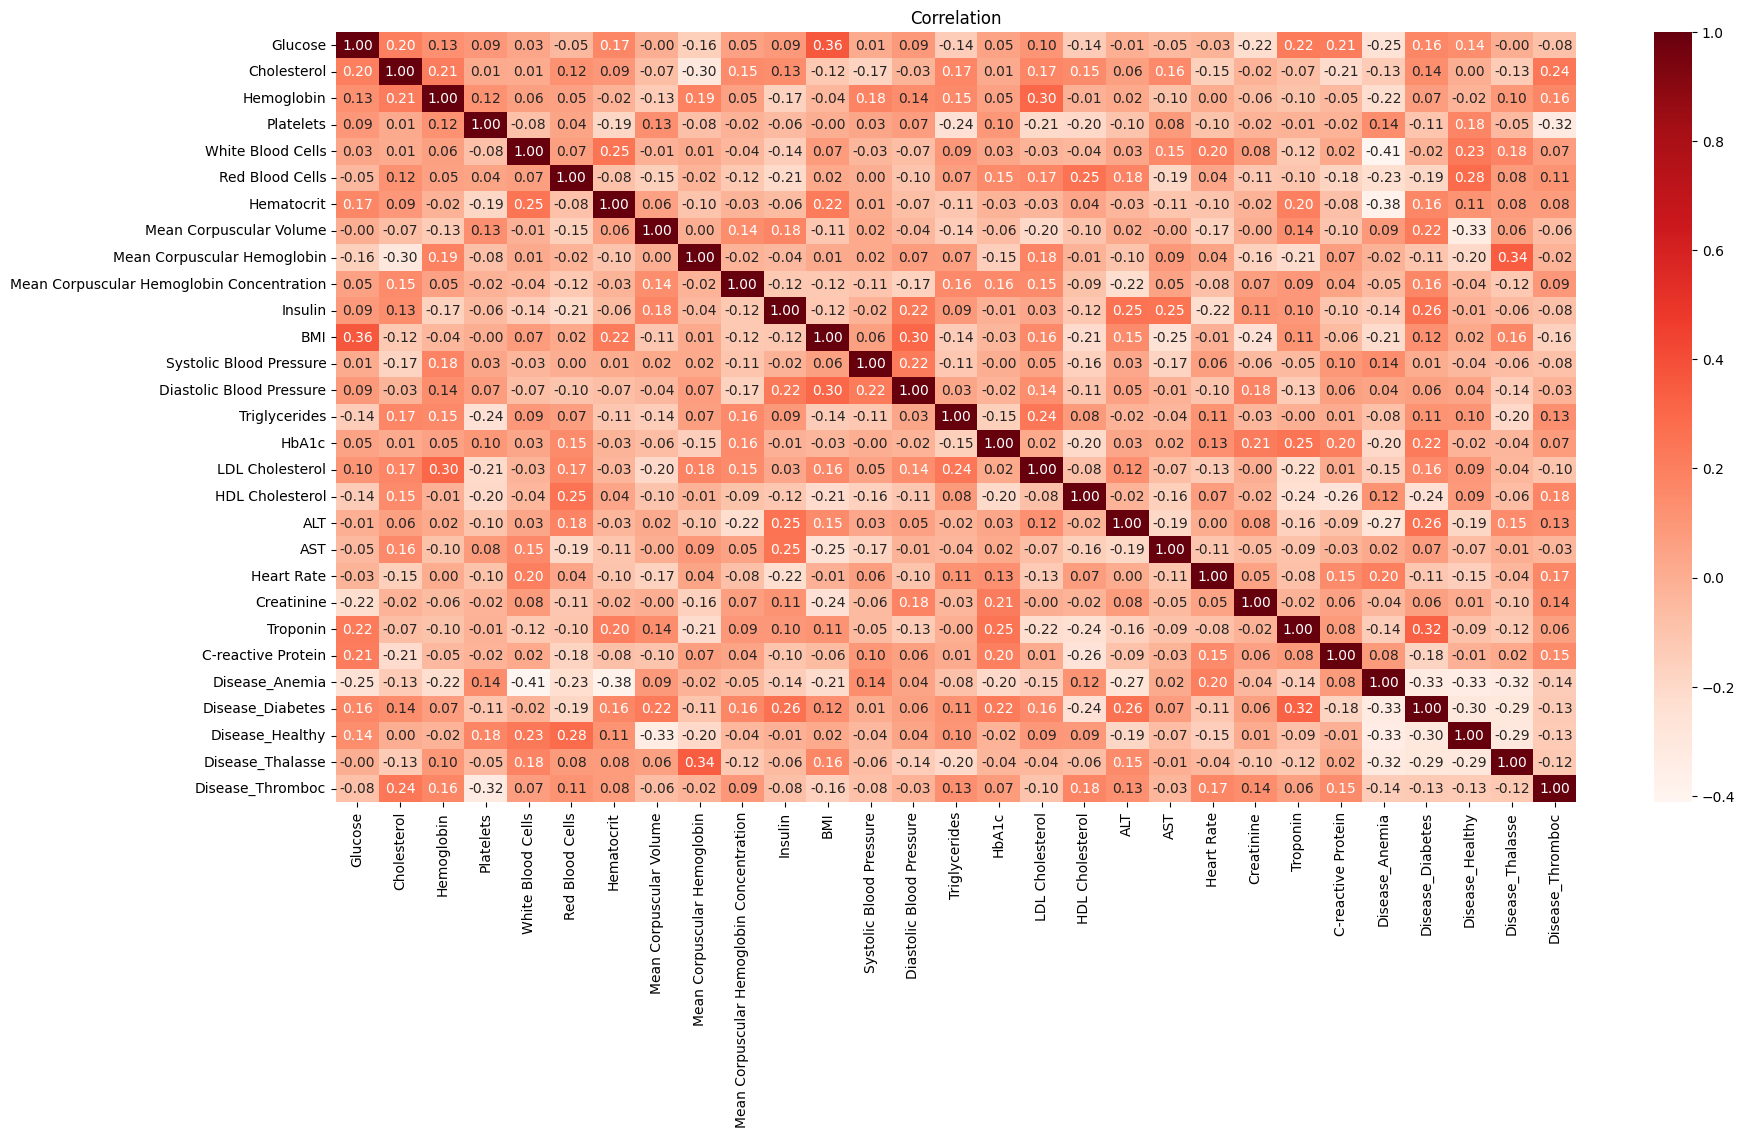

In [16]:
encoded = pd.get_dummies(train)

cor = encoded.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, annot=True, cmap = 'Reds', fmt=".2f")
plt.title('Correlation')
plt.show()

------------

**BMI vs. Variables by Disease**

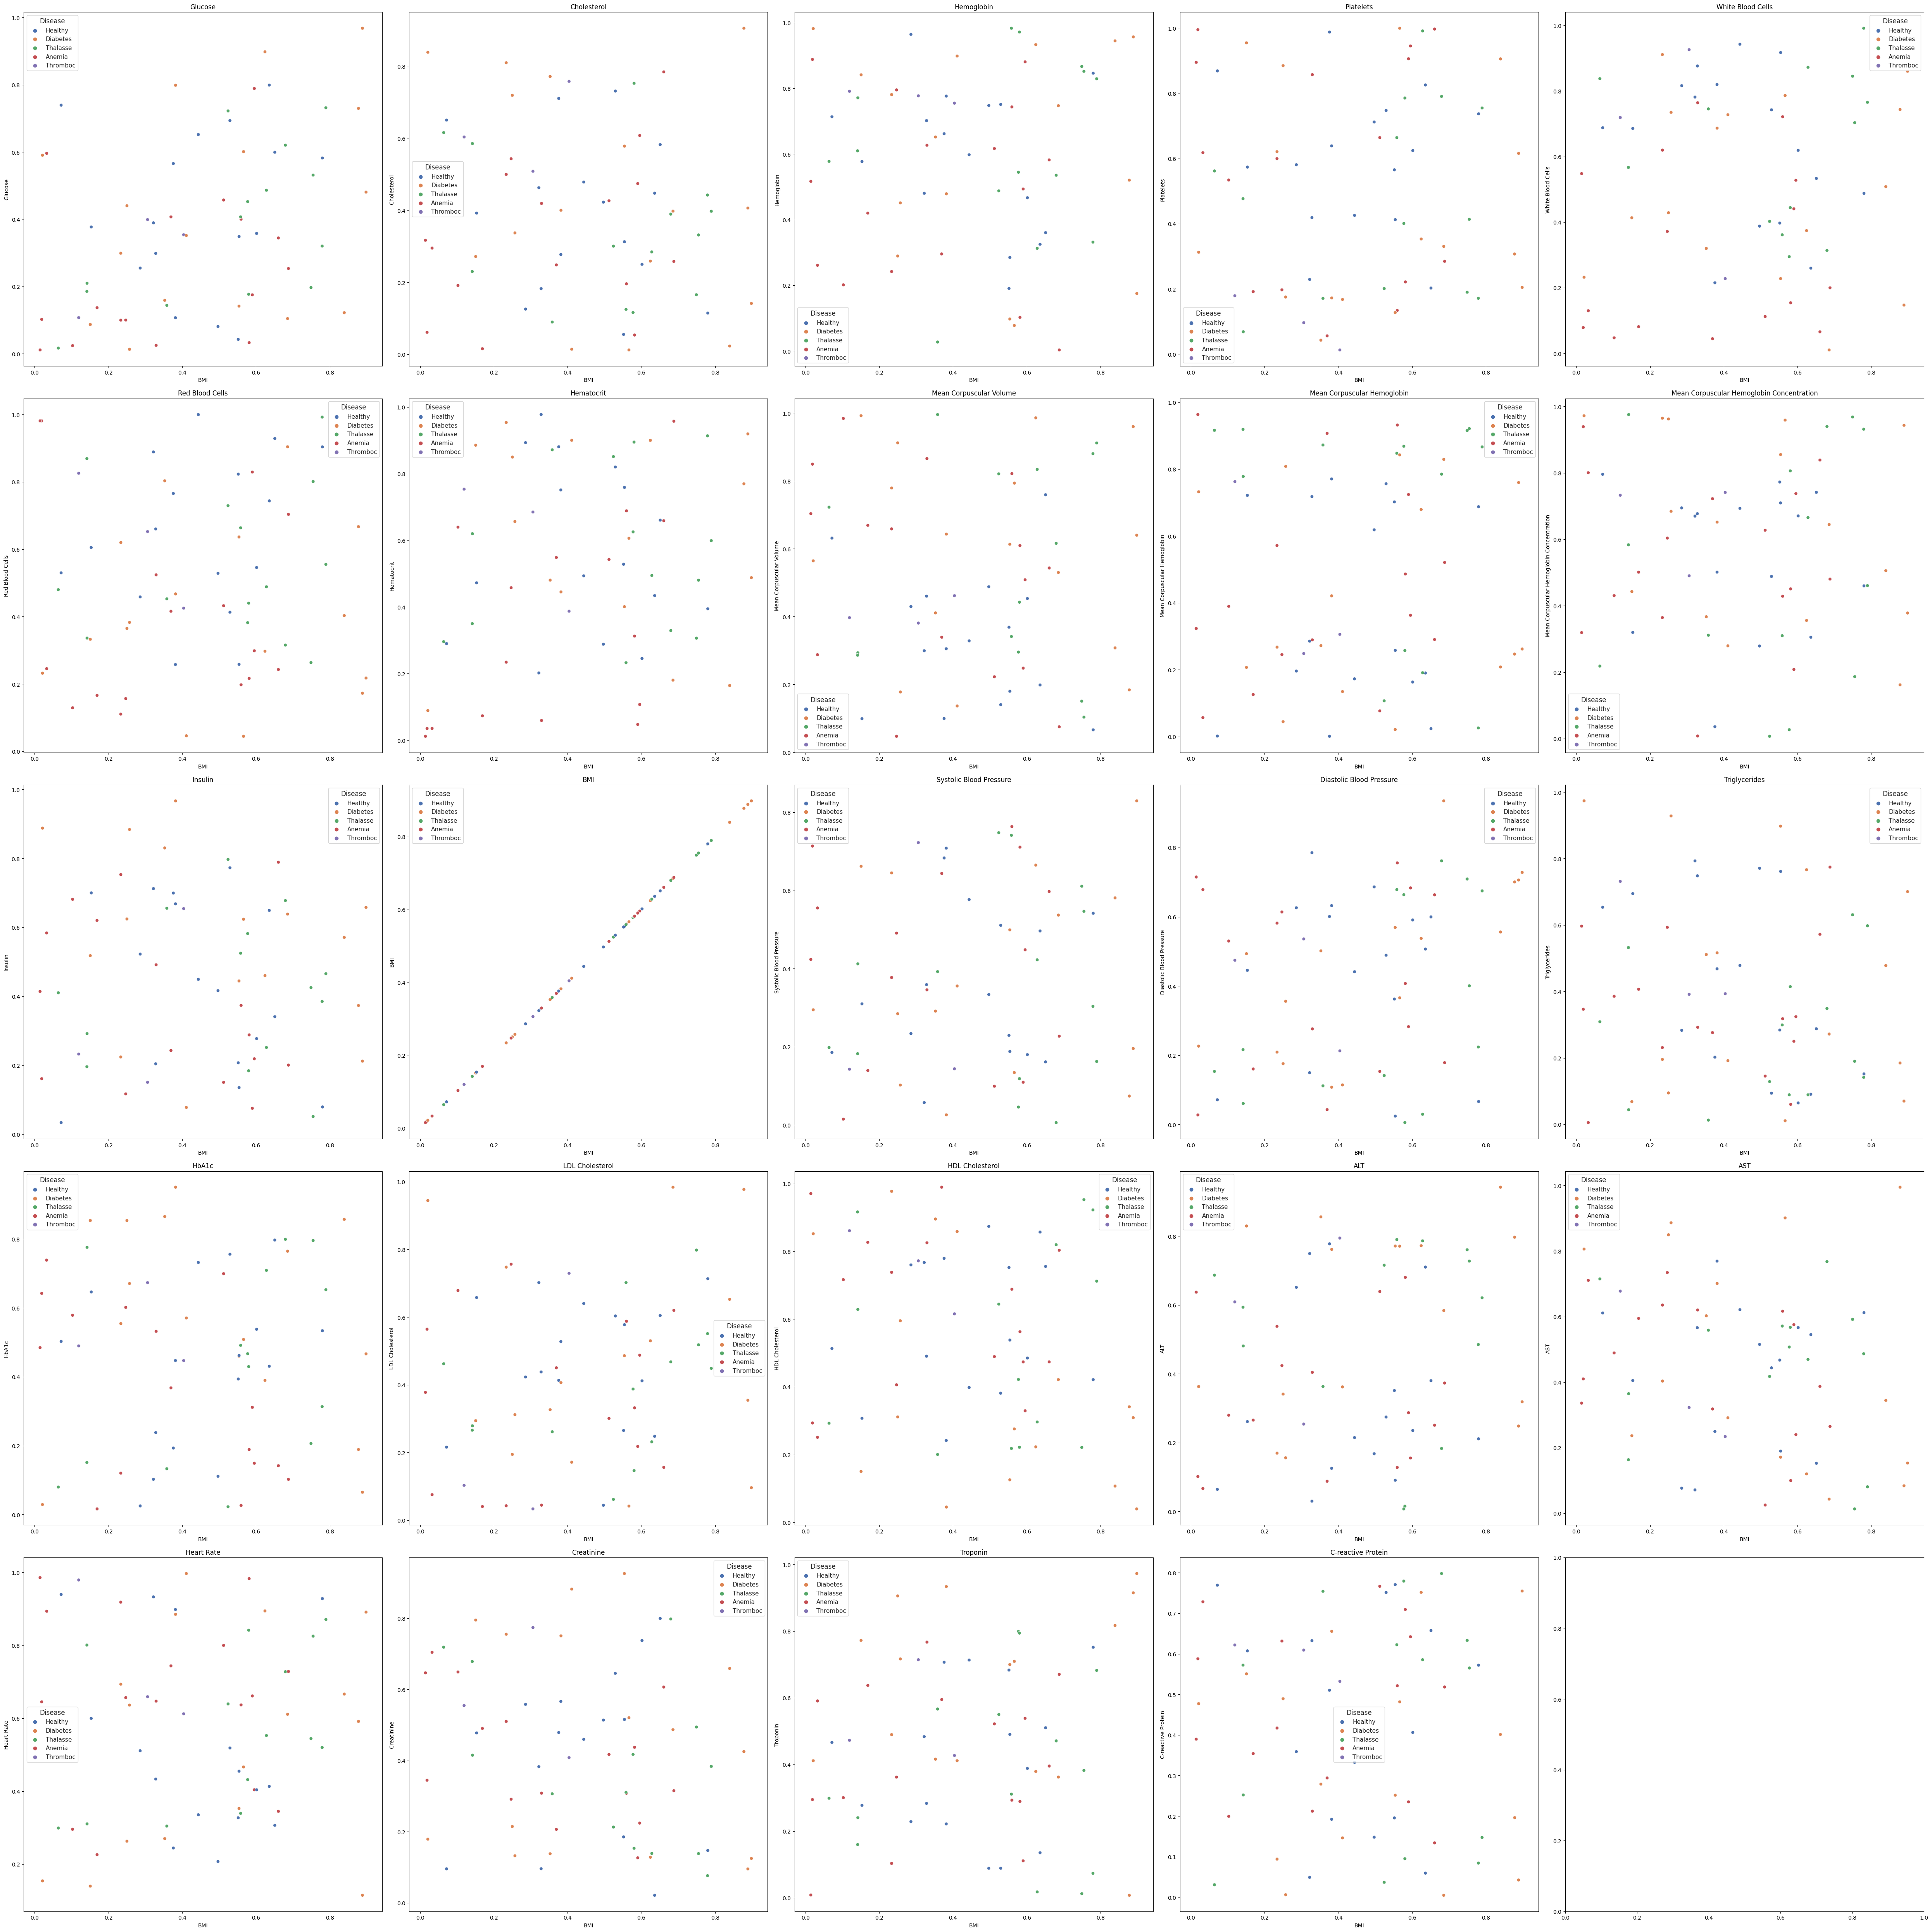

In [17]:
f, ax = plt.subplots(5,5, figsize=(50, 50))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.set(style="white") 
    sns.scatterplot(data=train, x='BMI',y= cols ,hue= 'Disease', ax=ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()    
plt.show()

-----------------

# **3. Modeling**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
df = pd.concat([train, test], ignore_index=True)

In [69]:
X = df.drop(columns=['Disease'])
y = df['Disease']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
LRG = LogisticRegression()
RF = RandomForestClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()

--------------------

**LogisticRegression**

In [75]:
LRG.fit(X_train, y_train)

LogisticRegression()

In [76]:
pred_LRG = LRG.predict(X_test)

In [81]:
print(f"Accuracy: {accuracy_score(y_test, pred_LRG)}")
print(f"Precision: {precision_score(y_test, pred_LRG, average='weighted')}")
print(f"Recall: {recall_score(y_test, pred_LRG, average='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_LRG, average='weighted')}")

Accuracy: 0.7975352112676056
Precision: 0.7897619532256624
Recall: 0.7975352112676056
F1 score: 0.7917884314824151


------------

**RandomForest**

In [82]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
pred_RF = RF.predict(X_test)

In [84]:
print(f"Accuracy: {accuracy_score(y_test, pred_RF)}")
print(f"Precision: {precision_score(y_test, pred_RF, average ='weighted')}")
print(f"Recall: {recall_score(y_test, pred_RF, average ='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_RF, average ='weighted')}")

Accuracy: 0.9524647887323944
Precision: 0.9450302853389767
Recall: 0.9524647887323944
F1 score: 0.9464818492202418


---------

**Support Vector Machine**

In [85]:
SVM.fit(X_train, y_train)

SVC()

In [86]:
pred_SVM = SVM.predict(X_test)

In [87]:
print(f"Accuracy: {accuracy_score(y_test, pred_SVM)}")
print(f"Precision: {precision_score(y_test, pred_SVM, average ='weighted')}")
print(f"Recall: {recall_score(y_test, pred_SVM, average ='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_SVM, average ='weighted')}")

Accuracy: 0.9471830985915493
Precision: 0.9378664583089038
Recall: 0.9471830985915493
F1 score: 0.9408580063443067


---------

**K-Nearest Neighbor**

In [88]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
pred_KNN = KNN.predict(X_test)

In [90]:
print(f"Accuracy: {accuracy_score(y_test, pred_KNN)}")
print(f"Precision: {precision_score(y_test, pred_KNN, average ='weighted')}")
print(f"Recall: {recall_score(y_test,pred_KNN, average ='weighted')}")
print(f"F1 score: {f1_score(y_test, pred_KNN, average ='weighted')}")

Accuracy: 0.8961267605633803
Precision: 0.8905315806156128
Recall: 0.8961267605633803
F1 score: 0.8902790495806514


-------------

# **4. Evaluation**

**The random forest model with the highest accuracy is the best model.**

---------

**Please leave your advice in the comments. Thank you**